# Plants Prediction

## Dataset
From Khalid: https://pmuedusa-my.sharepoint.com/personal/201701476_pmu_edu_sa/_layouts/15/onedrive.aspx?id=%2Fpersonal%2F201701476%5Fpmu%5Fedu%5Fsa%2FDocuments%2FSenior%20Project%20pics&ga=1

This the dataset with no modifications from an Iphone.


# Importing libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing

### Training Image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 319 files belonging to 4 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 90 files belonging to 4 classes.


### Apply Augmentation to the Training Set

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

augmented_training_set = training_set.map(
    lambda x, y: (data_augmentation(x, training=True), y)
)

# Building Model

In [13]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

#Output Layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 254, 254, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 127, 127, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 125, 125, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 62, 62, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │   172,801,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,094,512 (660.30 MB)

 Trainable params: 173,094,512 (660.30 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# Fit the model and pass the EarlyStopping callback
history = cnn.fit(
    augmented_training_set,
    validation_data=validation_set,
    epochs=15,
    callbacks=[early_stopping]  # Adding the EarlyStopping callback here
)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 14s/step - accuracy: 0.6125 - loss: 1.0486 - val_accuracy: 0.9667 - val_loss: 0.1396
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 119s 11s/step - accuracy: 0.6424 - loss: 0.8469 - val_accuracy: 0.9444 - val_loss: 0.1260
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 120s 12s/step - accuracy: 0.6866 - loss: 0.8764 - val_accuracy: 0.9778 - val_loss: 0.1202
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 133s 13s/step - accuracy: 0.6943 - loss: 0.7055 - val_accuracy: 0.9556 - val_loss: 0.1643
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 161s 15s/step - accuracy: 0.7671 - loss: 0.6435 - val_accuracy: 0.9889 - val_loss: 0.0963
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 111s 11s/step - accuracy: 0.7472 - loss: 0.5468 - val_accuracy: 0.9556 - val_loss: 0.1303
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 93s 9s/step - accuracy: 0.8345 - loss: 0.4789 - val_accuracy: 0.9333 - val_loss: 0.2286
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 103s 10s/step - accuracy: 0.8190 - loss: 0.5214 - val_accuracy: 0.92

# Evaluating Model

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 1.0000 - loss: 0.0390
Training accuracy: 1.0


In [18]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9827 - loss: 0.1136
Validation accuracy: 0.9888888597488403


## Saving Model

In [19]:
cnn.save('trained_plantCare_model.keras')

In [21]:
history.history #Return Dictionary of history

{'accuracy': [0.6175548434257507,
  0.66144198179245,
  0.7147335410118103,
  0.702194333076477,
  0.777429461479187,
  0.7366771101951599,
  0.8307210206985474,
  0.815047025680542],
 'loss': [1.0032776594161987,
  0.8295513987541199,
  0.8077481389045715,
  0.690617024898529,
  0.6352679133415222,
  0.5598291754722595,
  0.5030938386917114,
  0.4731384217739105],
 'val_accuracy': [0.9666666388511658,
  0.9444444179534912,
  0.9777777791023254,
  0.9555555582046509,
  0.9888888597488403,
  0.9555555582046509,
  0.9333333373069763,
  0.9222221970558167],
 'val_loss': [0.13962925970554352,
  0.1260393261909485,
  0.12020894140005112,
  0.16430458426475525,
  0.0962771326303482,
  0.13033433258533478,
  0.22861576080322266,
  0.19075816869735718]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(history.history,f)

In [24]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


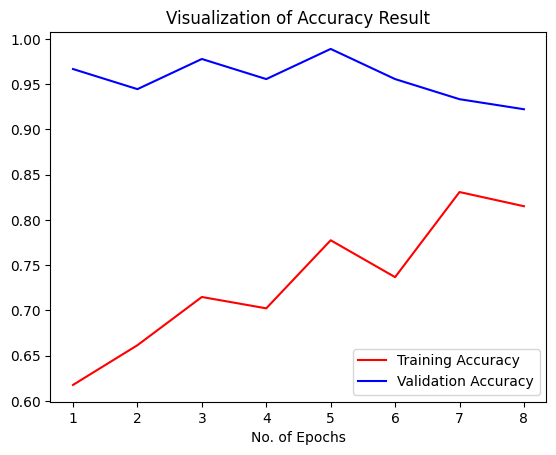

In [29]:
epochs = [i for i in range(1,9)]
plt.plot(epochs, history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()